In [ ]:
# prompt: Generame un codigo de un for computacionalmente pesado que pueda ser vectorizado con numpy

import numpy as np
import time

def computationally_heavy_loop(N):
  """
  This function performs a computationally heavy operation using a loop.
  """
  result = []
  for i in range(N):
    result.append(i**2 + np.sin(i))
  return result

def vectorized_computation(N):
  """
  This function performs the same computation as computationally_heavy_loop, but
  using NumPy's vectorization capabilities.
  """
  arr = np.arange(N)
  result = arr**2 + np.sin(arr)
  return result

N = 10000000 # Large number of iterations

# Time the loop-based approach
start_time = time.time()
loop_result = computationally_heavy_loop(N)
end_time = time.time()
loop_time = end_time - start_time

# Time the vectorized approach
start_time = time.time()
vectorized_result = vectorized_computation(N)
end_time = time.time()
vectorized_time = end_time - start_time

print(f"Loop time: {loop_time:.4f} seconds")
print(f"Vectorized time: {vectorized_time:.4f} seconds")


Loop time: 33.8114 seconds
Vectorized time: 0.3116 seconds


In [ ]:
# prompt: Paralelice el for utilizando joblib el código anterior

import numpy as np
import time
from joblib import Parallel, delayed


def computationally_heavy_loop_parallel(i):
  """
  This function performs a computationally heavy operation using a loop.
  """
  return i**2 + np.sin(i)

N = 10000000 # Large number of iterations

# Time the loop-based approach
start_time = time.time()
loop_result = Parallel(n_jobs=-1)(delayed(computationally_heavy_loop_parallel)(i) for i in range(N))
end_time = time.time()
loop_time = end_time - start_time


def vectorized_computation(N):
  """
  This function performs the same computation as computationally_heavy_loop, but
  using NumPy's vectorization capabilities.
  """
  arr = np.arange(N)
  result = arr**2 + np.sin(arr)
  return result


# Time the vectorized approach
start_time = time.time()
vectorized_result = vectorized_computation(N)
end_time = time.time()
vectorized_time = end_time - start_time

print(f"Loop time: {loop_time:.4f} seconds")
print(f"Vectorized time: {vectorized_time:.4f} seconds")


Loop time: 168.6523 seconds
Vectorized time: 0.5030 seconds


In [ ]:
# prompt: Ahora con multiprocessing

import numpy as np
import time
from multiprocessing import Pool

def computationally_heavy_loop_multiprocessing(i):
  """
  This function performs a computationally heavy operation using a loop.
  """
  return i**2 + np.sin(i)

N = 10000000 # Large number of iterations

# Time the loop-based approach with multiprocessing
start_time = time.time()
with Pool() as pool:
  loop_result = pool.map(computationally_heavy_loop_multiprocessing, range(N))
end_time = time.time()
loop_time = end_time - start_time


def vectorized_computation(N):
  """
  This function performs the same computation as computationally_heavy_loop, but
  using NumPy's vectorization capabilities.
  """
  arr = np.arange(N)
  result = arr**2 + np.sin(arr)
  return result


# Time the vectorized approach
start_time = time.time()
vectorized_result = vectorized_computation(N)
end_time = time.time()
vectorized_time = end_time - start_time

print(f"Loop time (multiprocessing): {loop_time:.4f} seconds")
print(f"Vectorized time: {vectorized_time:.4f} seconds")


Loop time (multiprocessing): 58.8249 seconds
Vectorized time: 0.4488 seconds


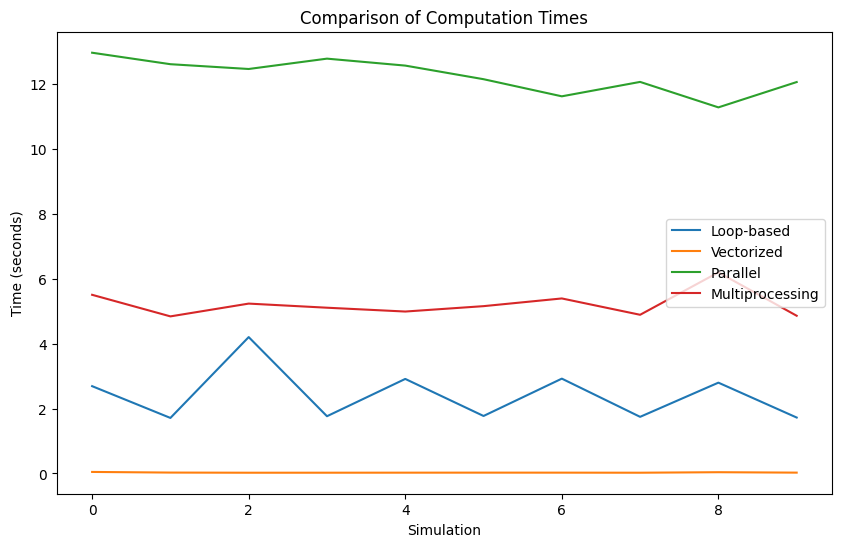

In [3]:
# prompt: Quiero los tres códigos anteriores los simules n veces y guardes esa información para después gráficarla

import numpy as np
import time
from joblib import Parallel, delayed
from multiprocessing import Pool
import matplotlib.pyplot as plt

def computationally_heavy_loop(N):
  """
  This function performs a computationally heavy operation using a loop.
  """
  result = []
  for i in range(N):
    result.append(i**2 + np.sin(i))
  return result

def vectorized_computation(N):
  """
  This function performs the same computation as computationally_heavy_loop, but
  using NumPy's vectorization capabilities.
  """
  arr = np.arange(N)
  result = arr**2 + np.sin(arr)
  return result

def computationally_heavy_loop_parallel(i):
  """
  This function performs a computationally heavy operation using a loop.
  """
  return i**2 + np.sin(i)

def computationally_heavy_loop_multiprocessing(i):
  """
  This function performs a computationally heavy operation using a loop.
  """
  return i**2 + np.sin(i)


def simulate_and_measure(N, num_simulations):
  loop_times = []
  vectorized_times = []
  parallel_times = []
  multiprocessing_times = []

  for _ in range(num_simulations):
    # Loop-based approach
    start_time = time.time()
    loop_result = computationally_heavy_loop(N)
    end_time = time.time()
    loop_times.append(end_time - start_time)

    # Vectorized approach
    start_time = time.time()
    vectorized_result = vectorized_computation(N)
    end_time = time.time()
    vectorized_times.append(end_time - start_time)

    # Parallel approach
    start_time = time.time()
    loop_result = Parallel(n_jobs=-1)(delayed(computationally_heavy_loop_parallel)(i) for i in range(N))
    end_time = time.time()
    parallel_times.append(end_time - start_time)

    # Multiprocessing approach
    start_time = time.time()
    with Pool() as pool:
      loop_result = pool.map(computationally_heavy_loop_multiprocessing, range(N))
    end_time = time.time()
    multiprocessing_times.append(end_time - start_time)


  return loop_times, vectorized_times, parallel_times, multiprocessing_times


N = 1000000
num_simulations = 10

loop_times, vectorized_times, parallel_times, multiprocessing_times = simulate_and_measure(N, num_simulations)


plt.figure(figsize=(10, 6))
plt.plot(loop_times, label='Loop-based')
plt.plot(vectorized_times, label='Vectorized')
plt.plot(parallel_times, label='Parallel')
plt.plot(multiprocessing_times, label='Multiprocessing')
plt.xlabel('Simulation')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Computation Times')
plt.legend()
plt.show()
